<font size = 6>2021國外論壇Stack Overflow年度調查報告分析</font>

In [45]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [46]:
df = pd.read_csv('survey_2021/survey_results_public.csv')
pd.set_option('display.max_columns', 47)
df.rename(columns = {'ResponseId': 'Respondant'}, inplace = True)
df = df.set_index('Respondant')

In [47]:
schema_df = pd.read_csv('survey_2021/survey_results_schema.csv')
schema_df.drop(columns = ['qid'], inplace = True)
schema_df.drop(index = [0,2,8,19,29,37,45], inplace = True)
schema_df = schema_df.set_index('qname')

In [48]:
df.head()

,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
Respondant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassan

In [49]:
schema_df.head()

,question,force_resp,type,selector
qname,,,,
MetaInfo,Browser Meta Info,False,Meta,Browser
MainBranch,Which of the following options best describes ...,True,MC,SAVR
Employment,Which of the following best describes your cur...,False,MC,MAVR
Country,"Where do you live? <span style=""font-weight: b...",True,MC,DL
US_State,<p>In which state or territory of the USA do y...,False,MC,DL


##

<font size = 5>平均寫程式經驗</font>

In [50]:
df['YearsCode'].unique()

array([nan, '7', '17', '3', '4', '6', '16', '12', '15', '10', '40', '9',
       '26', '14', '39', '20', '8', '19', '5', 'Less than 1 year', '22',
       '2', '1', '34', '21', '13', '25', '24', '30', '31', '18', '38',
       'More than 50 years', '27', '41', '42', '35', '23', '28', '11',
       '37', '44', '43', '36', '33', '45', '29', '50', '46', '32', '47',
       '49', '48'], dtype=object)

In [51]:
df['YearsCode'] = df['YearsCode'].replace('nan', np.NaN)
df['YearsCode'] = df['YearsCode'].replace('Less than 1 year', 0)
df['YearsCode'] = df['YearsCode'].replace('More than 50 years', 51)
df['YearsCode'] = df['YearsCode'].astype(float)

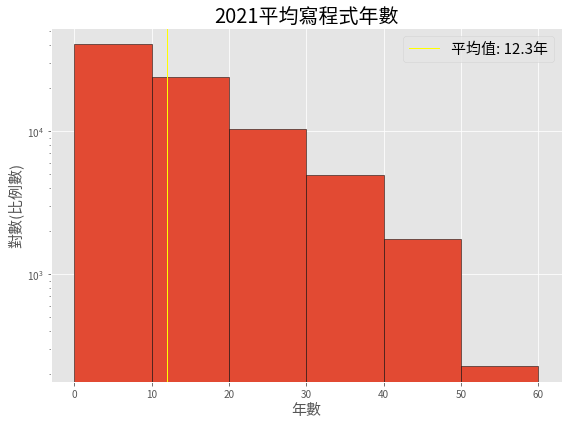

In [52]:
plt.style.use('ggplot')
plt.figure(figsize = (8,6))
bins = list(range(0,70,10))
plt.hist(df['YearsCode'], bins = bins, edgecolor = 'black', log = True)

average_year = int(df['YearsCode'].mean())
color = 'yellow'
plt.axvline(average_year, color = color, label = '平均值: 12.3年', linewidth = 1)

plt.title('2021平均寫程式年數', fontsize = 20)

plt.xlabel('年數', fontsize = 15)

plt.ylabel('對數(比例數)', fontsize = 15)
plt.legend(loc = 'best', fontsize = 15)
plt.tight_layout()
plt.show()

##

##

<font size = 5>語言歡迎程度</font>

In [53]:
from collections import Counter

result_counter = Counter()
df['LanguageHaveWorkedWith'].replace(np.NaN, 'None', inplace = True)

for x in df['LanguageHaveWorkedWith'].str.split(';'):
    result_counter.update(x)


most_common = result_counter.most_common(15)

lang = []
popu = []

for item in most_common:
    lang.append(item[0])
    popu.append(item[1])

lang.reverse()
popu.reverse()

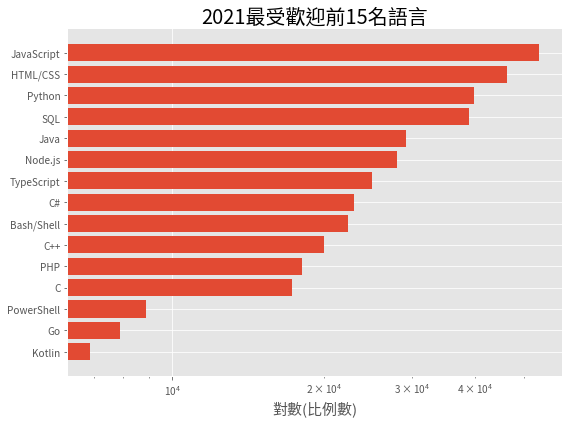

In [54]:
plt.style.use('ggplot')
plt.figure(figsize = (8,6))

plt.barh(lang, popu, log = True)

plt.title('2021最受歡迎前15名語言', fontsize = 20)
plt.xlabel('對數(比例數)', fontsize = 15)

plt.tight_layout()
plt.show()

##

##

<font size = 5>作業系統</font>

In [55]:
df['OpSys'].unique()

array(['MacOS', 'Windows', 'Linux-based', 'BSD',
       'Other (please specify):', nan,
       'Windows Subsystem for Linux (WSL)'], dtype=object)

In [56]:
df['OpSys'] = df['OpSys'].replace(np.NaN, 'No-info')
df['OpSys'] = df['OpSys'].replace('Other (please specify):', 'No-info')
df['OpSys'] = df['OpSys'].replace('Windows Subsystem for Linux (WSL)', 'WSL')

In [57]:
sys_counter = Counter()
sys_counter.update(df['OpSys'])
del sys_counter['No-info']
oper = list(sys_counter.keys())
popu = list(sys_counter.values())

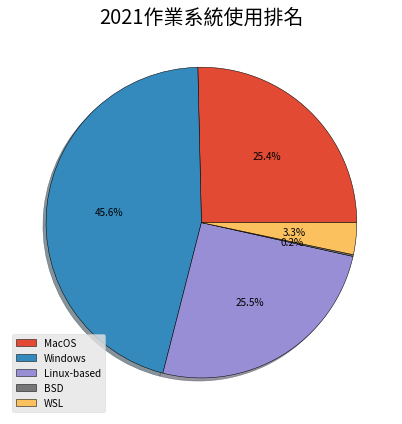

In [58]:
plt.style.use('ggplot')
plt.figure(figsize = (6,6))

slices = popu
labels = oper

plt.pie(slices,
        wedgeprops = {'edgecolor':'black'},
        autopct = '%1.1f%%',
        shadow = True
        )

plt.legend(labels, loc = 'lower left')
plt.title('2021作業系統使用排名', fontsize = 20)


plt.tight_layout()
plt.show()

##

##

<font size = 5>資料庫管理系統歡迎程度</font>

In [59]:
result_counter = Counter()
df['DatabaseHaveWorkedWith'].replace(np.NaN, 'None', inplace = True)

for x in df['DatabaseHaveWorkedWith'].str.split(';'):
    result_counter.update(x)


most_common = result_counter.most_common(15)

db = []
popu = []

for item in most_common:
    db.append(item[0])
    popu.append(item[1])

db.reverse()
popu.reverse()

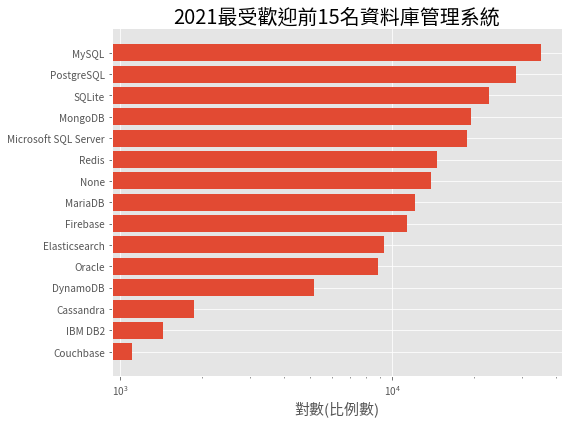

In [60]:
plt.style.use('ggplot')
plt.figure(figsize = (8,6))

plt.barh(db, popu,log = True)

plt.title('2021最受歡迎前15名資料庫管理系統', fontsize = 20)
plt.xlabel('對數(比例數)', fontsize = 15)

plt.tight_layout()
plt.show()

##

<font size = 5>受訪者年齡與性別分布</font>

<font size =4>年齡</font>

In [61]:
df['Age'].unique()

array(['25-34 years old', '18-24 years old', '35-44 years old',
       'Prefer not to say', '45-54 years old', 'Under 18 years old',
       '65 years or older', '55-64 years old', nan], dtype=object)

In [62]:
df['Age'] = df['Age'].str.replace('years old', '')
df['Age']= df['Age'].str.replace('Under', '<')
df['Age'].replace('65 years or older', '>= 65 ', inplace = True)

In [63]:
age_counter = Counter()
age_counter.update(df['Age'])
del age_counter[np.NaN]

age_list = list(age_counter.values())
age_np_list = np.array(list(age_counter.values()))
x = 0
for b in age_list:
    x = x + b

age_percentage = (age_np_list *100 / x).round(2)

age_pct = []
for x in age_percentage:
    x = str(x) + '%'
    age_pct.append(x)

i = 0
age_dict = {}
for x in age_counter.keys():
    age_dict[x] = age_pct[i]
    i += 1

age_dict

{'25-34 ': '39.52%',
 '18-24 ': '25.47%',
 '35-44 ': '18.42%',
 'Prefer not to say': '0.7%',
 '45-54 ': '6.64%',
 '< 18 ': '6.52%',
 '>= 65 ': '0.51%',
 '55-64 ': '2.21%'}

##

<font size =4>性別</font>

In [64]:
df['Gender'].unique()


array(['Man', 'Prefer not to say', 'Woman',
       'Non-binary, genderqueer, or gender non-conforming',
       'Man;Or, in your own words:', nan,
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Or, in your own words:', 'Man;Woman',
       'Man;Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:',
       'Non-binary, genderqueer, or gender non-conforming;Or, in your own words:',
       'Woman;Or, in your own words:',
       'Man;Woman;Non-binary, genderqueer, or gender non-conforming',
       'Man;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:',
       'Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:',
       'Man;Woman;Or, in your own words:'], dtype=object)

In [65]:
df['Gender'].replace('Non-binary, genderqueer, or gender non-conforming', 'Prefer not to say', inplace = True)
df['Gender'].replace('Man;Or, in your own words:', 'Man', inplace = True)
df['Gender'].replace('Woman;Non-binary, genderqueer, or gender non-conforming', 'Woman', inplace = True)
df['Gender'].replace('Man;Non-binary, genderqueer, or gender non-conforming', 'Man', inplace = True)
df['Gender'].replace('Or, in your own words:', 'Prefer not to say', inplace = True)
df['Gender'].replace('Man;Woman', 'Prefer not to say', inplace = True)
df['Gender'].replace('Man;Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:', 'Prefer not to say', inplace = True)
df['Gender'].replace('Non-binary, genderqueer, or gender non-conforming;Or, in your own words:', 'Prefer not to say', inplace = True)
df['Gender'].replace('Woman;Or, in your own words:', 'Woman', inplace = True)
df['Gender'].replace('Man;Woman;Non-binary, genderqueer, or gender non-conforming:', 'Prefer not to say', inplace = True)
df['Gender'].replace('Man;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:', 'Man', inplace = True)
df['Gender'].replace('Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:', 'Woman', inplace = True)
df['Gender'].replace('Man;Woman;Or, in your own words:', 'Prefer not to say', inplace = True)
df['Gender'].replace('Man;Woman;Non-binary, genderqueer, or gender non-conforming', 'Prefer not to say', inplace = True)


In [66]:
gender_counter = Counter()
gender_counter.update(df['Gender'])
del gender_counter[np.NaN]

gender_list = list(gender_counter.values())
gender_np_list = np.array(list(gender_counter.values()))
x = 0
for b in gender_list:
    x = x + b

gender_percentage = (gender_np_list *100 / x).round(2)

gender_pct = []
for x in gender_percentage:
    x = str(x) + '%'
    gender_pct.append(x)

i = 0
gender_dict = {}
for x in gender_counter.keys():
    gender_dict[x] = gender_pct[i]
    i += 1

gender_dict

{'Man': '91.57%', 'Prefer not to say': '3.22%', 'Woman': '5.22%'}

##

<font size = 4>標籤</font>

In [67]:
a_keys = []
for key in age_dict.keys():
    key = str(key)
    a_keys.append(key)

a_values = []
for value in age_dict.values():
    value = str(value)
    a_values.append(value)


age_labels = []

for i in range(0,8):
    r = a_keys[i] + ': ' + a_values[i]
    age_labels.append(r)




g_keys = []
for key in gender_dict.keys():
    key = str(key)
    g_keys.append(key)

g_values = []
for value in gender_dict.values():
    value = str(value)
    g_values.append(value)


gender_labels = []

for i in range(0,3):
    r = g_keys[i] + ': ' + g_values[i]
    gender_labels.append(r)



Text(0.5, 1.0, '受訪者性別比例')

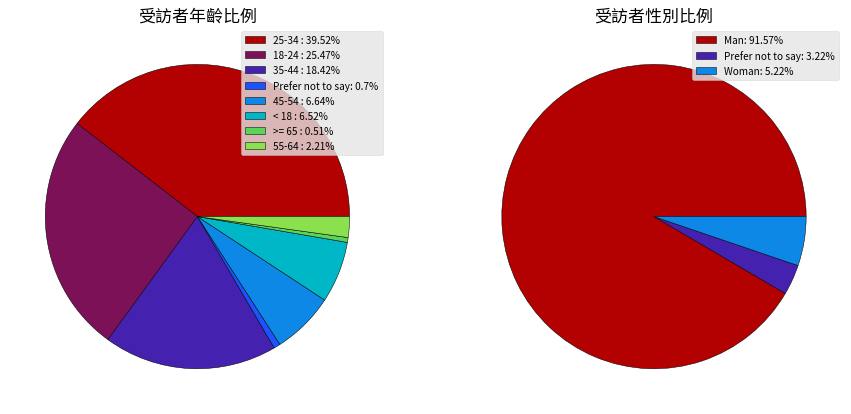

In [68]:
fig, (age, gender) = plt.subplots(nrows = 1, ncols = 2, figsize=(15,25))

slices = age_counter.values()
labels = age_labels
colors = ["#b30000", "#7c1158", "#4421af", "#1a53ff", "#0d88e6", "#00b7c7", "#5ad45a", "#8be04e"]

age.pie(slices,colors = colors, wedgeprops = {'edgecolor': 'black'})

age.legend(labels, loc = 'best')
age.set_title('受訪者年齡比例', fontsize = 17)


slices = gender_counter.values()
labels = gender_labels
colors = ["#b30000","#4421af","#0d88e6"]

gender.pie(slices,colors = colors, wedgeprops = {'edgecolor': 'black'})

gender.legend(labels, loc = 'best')
gender.set_title('受訪者性別比例', fontsize = 17)
